## Validate Data Completeness for Critical Fields

**Description**: In `transaction_data.csv` , calculate the missing percentage of critical fields: "transaction_id", "amount", and "date", and visualize them.

Missing Data Percentage for Critical Fields:
transaction_id     0.0
amount            40.0
date              20.0


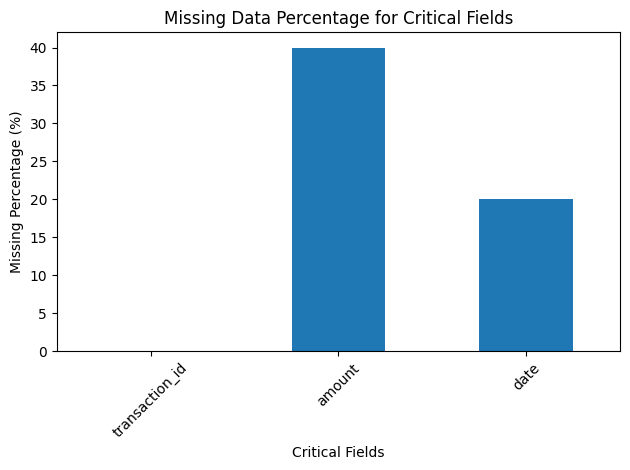

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_missing_percentage(csv_file, critical_fields):
    """
    Calculates the percentage of missing values for specified critical fields in a CSV file.

    Args:
        csv_file (str): Path to the CSV file.
        critical_fields (list): A list of critical field names (e.g., ["transaction_id", "amount", "date"]).

    Returns:
        pandas.Series: A Series containing the percentage of missing values for each critical field,
                        or None if an error occurs.
        matplotlib.figure.Figure: The matplotlib figure object showing the missing value percentages,
                                  or None if an error occurs.
    """
    try:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")
        return None, None
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None, None

    # Check if all critical fields exist in the DataFrame
    for field in critical_fields:
        if field not in df.columns:
            print(f"Error: Critical field '{field}' not found in the file.")
            return None, None

    # Calculate the number of missing values for each critical field
    missing_values = df[critical_fields].isnull().sum()

    # Calculate the percentage of missing values for each critical field
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100

    # Create a bar chart to visualize the missing percentages
    fig, ax = plt.subplots()
    missing_percentage.plot(kind='bar', ax=ax)
    plt.title('Missing Data Percentage for Critical Fields')
    plt.xlabel('Critical Fields')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout() #adjust the plot

    return missing_percentage, fig



def main():
    """
    Main function to run the missing data percentage calculation and display the plot.
    """
    # Provide the path to your CSV file
    csv_file = 'transaction_data.csv'  # Replace with your actual file path

    # Define the list of critical fields
    critical_fields = ["transaction_id", "amount", "date"]

    # Create a dummy CSV file for demonstration
    try:
        with open(csv_file, 'w') as f:
            f.write("transaction_id,amount,date,customer_id\n1,10.0,2024-01-01,101\n2,,2024-01-02,102\n3,15.0,,103\n4,20.0,2024-01-04,104\n5,,2024-01-05,105")
    except FileExistsError:
        pass

    # Calculate and visualize missing data percentage
    missing_percentage, fig = calculate_missing_percentage(csv_file, critical_fields)

    # Print the results and show the plot
    if missing_percentage is not None and fig is not None:
        print("Missing Data Percentage for Critical Fields:")
        print(missing_percentage.to_string())
        plt.show()
    else:
        print("Error occurred while calculating or visualizing missing data percentage.")



if __name__ == "__main__":
    main()
